In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import dash
import dash_core_components as dcc
import dash_html_components as html

from sklearn import preprocessing

from IPython.display import display, HTML

pd.set_option('float_format', '{:,.2f}'.format)
np.set_printoptions(precision=3)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

## Part 1: Download and preprocesses the data

In [3]:
df = pd.read_excel('Dolar_Today.xlsx')

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

df.set_index('Fecha', inplace=True)

#### Split the Data ####

In [5]:
dff = df

In [6]:
Start_Date_train = "2019-1"
End_Date_train = "2019-9"

dff_train = dff[Start_Date_train:End_Date_train]

dff_train.shape

(273, 1)

In [7]:
Start_Date_test = "2019-9"
End_Date_test = "2019-12"

dff_test = dff[Start_Date_test:End_Date_test]

dff_test.shape

(40, 1)

In [8]:
train_varible = dff_train['DolarToday']
train_index = dff_train.index
train_df = dff_train

test_variable = dff_test['DolarToday']
test_index = dff_test.index
test_df = dff_test

In [9]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

data = [trace1, trace2]

layout = go.Layout(title="Train / Test")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

## Part 2: Data Analysis

### Descriptive

In [10]:
print ('Data Train mean: {}.'.format(dff_train.mean()))
print ('Data Test mean: {}.'.format(dff_test.mean()))

Data Train mean: DolarToday   818,066,827.84
dtype: float64.
Data Test mean: DolarToday   2,135,384,225.00
dtype: float64.


In [11]:
print ('Data Train: \n {}'.format(dff_train.describe()))
print ('\n')
print ('Data Test: \n {}'.format(dff_test.describe()))

Data Train: 
             DolarToday
count           273.00
mean    818,066,827.84
std     636,643,250.14
min      73,029,000.00
25%     359,378,000.00
50%     591,843,000.00
75%   1,127,512,000.00
max   2,601,282,000.00


Data Test: 
             DolarToday
count            40.00
mean  2,135,384,225.00
std     150,198,773.13
min   1,986,106,000.00
25%   2,036,143,000.00
50%   2,107,572,000.00
75%   2,168,266,750.00
max   2,601,282,000.00


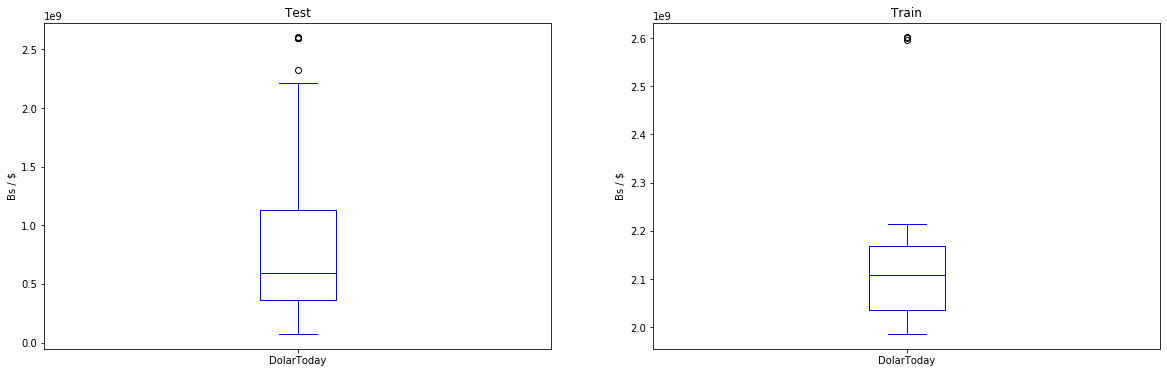

In [12]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
dff_train.plot(kind='box', color='blue', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Test')
ax0.set_ylabel('Bs / $')

# Subplot 2: Line plot
dff_test.plot(kind='box', color='blue', vert=True, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Train')
ax1.set_ylabel('Bs / $')

plt.show()

## Part 3: Modeling

### Naive Approach

In [13]:
dd= np.asarray(train_varible)

y_hat = dff_test.copy()

y_hat['naive'] = dd[len(dd)-1]

rms_naive = sqrt(mean_squared_error(test_variable, y_hat.naive))

print('RMSE Naive = {}'.format(rms_naive))

RMSE Naive = 148409994.57844812


In [14]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat['naive'],
                  mode='lines',
                  name='Naive Forecast')


data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Naive approach")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Simple Average

In [15]:
y_hat_avg = dff_test.copy()

y_hat_avg['avg_forecast'] = train_varible.mean()

rms_simple_av = sqrt(mean_squared_error(test_variable, y_hat_avg.avg_forecast))

print('RMSE Simple Average = {}'.format(rms_simple_av))

RMSE Simple Average = 1325639771.7807276


In [16]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['avg_forecast'],
                  mode='lines',
                  name='Simple Average')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Simple Average")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Moving Average

In [17]:
y_hat_avg = dff_test.copy()

y_hat_avg['moving_avg_forecast'] = train_varible.rolling(24).mean().iloc[-1]

rms_moving_av = sqrt(mean_squared_error(test_variable, y_hat_avg.moving_avg_forecast))

print('RMSE Moving Average = {}'.format(rms_moving_av))

RMSE Moving Average = 148820135.40555516


In [18]:

trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['moving_avg_forecast'],
                  mode='lines',
                  name='Moving Average')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Search term")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Simple Exponential Smoothing

In [19]:
y_hat_avg = dff_test.copy()

fit2 = SimpleExpSmoothing(np.asarray(train_varible)).fit(smoothing_level=0.6,optimized=False)

y_hat_avg['SES'] = fit2.forecast(len(dff_test))

rms_ses = sqrt(mean_squared_error(test_variable, y_hat_avg.SES))

print('RMSE SES = {}'.format(rms_ses))

RMSE SES = 148318957.1847331


In [20]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['SES'],
                  mode='lines',
                  name='SES')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Simple Exponential Smoothing")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Holt’s Linear Trend method

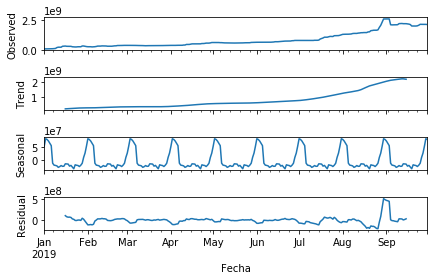

In [21]:
sm.tsa.seasonal_decompose(train_varible, freq=30).plot()
result = sm.tsa.stattools.adfuller(train_varible)
plt.show()

In [22]:
y_hat_avg = test_df.copy()

fit1 = Holt(np.asarray(train_varible)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

y_hat_avg['Holt_linear'] = fit1.forecast(len(test_df))

rms_holt_linear = sqrt(mean_squared_error(test_variable, y_hat_avg.Holt_linear))

print('RMSE Holt Linear = {}'.format(rms_holt_linear))

RMSE Holt Linear = 157076080.11327177


In [23]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['Holt_linear'],
                  mode='lines',
                  name='Holt_linear')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Holt’s Linear Trend method")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Holt-Winters Method

In [24]:
y_hat_avg = dff_test.copy()

fit1 = ExponentialSmoothing(np.asarray(train_varible) ,seasonal_periods=7 ,
                            trend='add', seasonal='add').fit()

y_hat_avg['Holt_Winter'] = fit1.forecast(len(dff_test))

rms_holt_winters = sqrt(mean_squared_error(test_variable, y_hat_avg.Holt_Winter))

print('RMSE Holt Winters = {}'.format(rms_holt_winters))

RMSE Holt Winters = 315070244.7177454


In [25]:
trace1 = go.Scatter(x=train_index,
                    y=train_varible,
                  mode='lines',
                  name='Train')

trace2 = go.Scatter(x=test_index,
                    y=test_variable,
                  mode='lines',
                  name='Test')

trace3 = go.Scatter(x=y_hat.index,
                    y=y_hat_avg['Holt_Winter'],
                  mode='lines',
                  name='Holt-Winters')

data = [trace1, trace2, trace3]

layout = go.Layout(title="Train / Test - Holt-Winters Method")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### ARIMA

In [26]:
### Not ready ###

### Results

In [27]:
data = [['Naive', rms_naive], 
        ['Simple Average', rms_simple_av],
        ['Moving Average', rms_moving_av],
        ['Simple Exponential Smoothing', rms_ses],
        ['Holt’s Linear', rms_holt_linear],
        ['Holt Winters', rms_holt_winters]]

df_results = pd.DataFrame(data, columns=['Model', 'Result'])

df_results.sort_values(by='Result')

,Model,Result
3,Simple Exponential Smoothing,"148,318,957.18"
0,Naive,"148,409,994.58"
2,Moving Average,"148,820,135.41"
4,Holt’s Linear,"157,076,080.11"
5,Holt Winters,"315,070,244.72"
1,Simple Average,"1,325,639,771.78"


## Part 4: Manual modeling

#### Preparing

In [28]:
# Period

Start_Date_ave = "2019-1"
End_Date_ave = "2019-12"

#### Simple Moving Average

In [29]:
df_SMA = df[Start_Date_ave:End_Date_ave]

In [30]:
window1 = 20
window2 = 50

rolling_mean = df_SMA['DolarToday'].rolling(window=window1).mean()
rolling_mean2 = df_SMA['DolarToday'].rolling(window=window2).mean()

df_SMA['Rolling_mean'] = rolling_mean
df_SMA['Rolling_mean2'] = rolling_mean2

df_SMA = df_SMA.dropna()

# Mean Square Error

df_SMA_NORMALIZE = preprocessing.StandardScaler().fit(df_SMA).transform(df_SMA)

df_SMA_MSE1 = sqrt(mean_squared_error(df_SMA_NORMALIZE[0], df_SMA_NORMALIZE[1]))
df_SMA_MSE2 = sqrt(mean_squared_error(df_SMA_NORMALIZE[0], df_SMA_NORMALIZE[2]))

data = [['SMA {}'.format(window1), df_SMA_MSE1],
        ['SMA {}'.format(window2), df_SMA_MSE2]]
                                   
Table_SMA_MSE = pd.DataFrame(data, columns=['Model', 'Mean Squared Error'])

Table_SMA_MSE.sort_values(by='Mean Squared Error')

,Model,Mean Squared Error
0,SMA 20,0.01
1,SMA 50,0.02


In [31]:
trace1 = go.Scatter(x=df_SMA.index,
                    y=df_SMA['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_SMA.index,
                    y=rolling_mean,
                  mode='lines',
                  name='20 SMA')

trace3 = go.Scatter(x=df_SMA.index,
                    y=rolling_mean2,
                  mode='lines',
                  name='90 SMA')


data = [trace1, trace2,trace3]

layout = go.Layout(title="Simple Moving Average")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### EMA

In [32]:
df_EMA = df[Start_Date_ave:End_Date_ave]

In [33]:
span1 = 20
span2 = 50

exp1 = df_EMA['DolarToday'].ewm(span=span1, adjust=False).mean()
exp2 = df_EMA['DolarToday'].ewm(span=span2, adjust=False).mean()

df_EMA['exp1'] = exp1
df_EMA['exp2'] = exp2

df_EMA = df_EMA.dropna()

# Mean Square Error

df_EMA_NORMALIZE = preprocessing.StandardScaler().fit(df_EMA).transform(df_EMA)

df_EMA_MSE1 = sqrt(mean_squared_error(df_EMA_NORMALIZE[0], df_EMA_NORMALIZE[1]))
df_EMA_MSE2 = sqrt(mean_squared_error(df_EMA_NORMALIZE[0], df_EMA_NORMALIZE[2]))

data = [['EMA {}'.format(span1), df_EMA_MSE1],
        ['EMA {}'.format(span2), df_EMA_MSE2]]
                                   
Table_EMA_MSE = pd.DataFrame(data, columns=['Model', 'Mean Squared Error'])

Table_EMA_MSE.sort_values(by='Mean Squared Error')

,Model,Mean Squared Error
0,EMA 20,0.00
1,EMA 50,0.01


In [34]:
trace1 = go.Scatter(x=df_EMA.index,
                    y=df_EMA['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_EMA.index,
                    y=exp1,
                  mode='lines',
                  name='Exp {}'.format(span1))

trace3 = go.Scatter(x=df_EMA.index,
                    y=exp2,
                  mode='lines',
                  name='Exp {}'.format(span2))


data = [trace1, trace2,trace3]

layout = go.Layout(title="EMA")

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### DEMA & TEMA

In [35]:
df_DEMA = df[Start_Date_ave:End_Date_ave]

In [36]:
span = 50

In [37]:
df_DEMA['ema1'] = df_DEMA['DolarToday'].ewm(span=span, adjust=False).mean()

df_DEMA['ema2'] = df_DEMA['ema1'].ewm(span=span, adjust=False).mean()

df_DEMA['DEMA'] = (df_DEMA['ema1'] * 2) - df_DEMA['ema2']

df_DEMA['TEMA'] = df_DEMA['ema2'].ewm(span=span, adjust=False).mean()

In [38]:
df_DEMA.head()

,DolarToday,ema1,ema2,DEMA,TEMA
Fecha,,,,,
2019-01-01,"73,029,000.00","73,029,000.00","73,029,000.00","73,029,000.00","73,029,000.00"
2019-01-02,"78,128,000.00","73,228,960.78","73,036,841.60","73,421,079.97","73,029,307.51"
2019-01-03,"81,096,000.00","73,537,472.13","73,056,474.17","74,018,470.08","73,030,372.87"
2019-01-04,"84,124,000.00","73,952,630.08","73,091,617.54","74,813,642.63","73,032,774.62"
2019-01-05,"84,124,000.00","74,351,507.33","73,141,024.98","75,561,989.69","73,037,019.74"


In [39]:
# Mean Square Error

df_DEMA_NORMALIZE = preprocessing.StandardScaler().fit(df_DEMA).transform(df_DEMA)

df_DEMA_MSE1 = sqrt(mean_squared_error(df_DEMA_NORMALIZE[0], df_DEMA_NORMALIZE[3]))
df_DEMA_MSE2 = sqrt(mean_squared_error(df_DEMA_NORMALIZE[0], df_DEMA_NORMALIZE[4]))

data = [['DEMA {}'.format(span), df_DEMA_MSE1],
        ['TEMA {}'.format(span), df_DEMA_MSE2]]
                                   
Table_DEMA_MSE = pd.DataFrame(data, columns=['Model', 'Mean Squared Error'])

Table_DEMA_MSE.sort_values(by='Mean Squared Error')

,Model,Mean Squared Error
0,DEMA 50,0.01
1,TEMA 50,0.01


In [40]:
trace1 = go.Scatter(x=df_DEMA.index,
                    y=df_DEMA['DolarToday'],
                  mode='lines',
                  name='Dolar Today')

trace2 = go.Scatter(x=df_DEMA.index,
                    y=df_DEMA['ema1'],
                  mode='lines',
                  name='EMA span {}'.format(span))

trace3 = go.Scatter(x=df_EMA.index,
                    y=df_DEMA['DEMA'],
                  mode='lines',
                  name='DEMA span {}'.format(span))

trace4 = go.Scatter(x=df_EMA.index,
                    y=df_DEMA['TEMA'],
                  mode='lines',
                  name='TEMA')


data = [trace1, trace2,trace3, trace4]

layout = go.Layout(title="EMA / DEMA / TEMA -- span{}".format(span))

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

### Means Square Error resume

In [41]:
Table_MSE = pd.concat([Table_SMA_MSE, Table_EMA_MSE, Table_DEMA_MSE])
Table_MSE = Table_MSE.set_index('Model')
Table_MSE.sort_values(by='Mean Squared Error')

,Mean Squared Error
Model,
EMA 20,0.00
EMA 50,0.01
DEMA 50,0.01
TEMA 50,0.01
SMA 20,0.01
SMA 50,0.02


In [42]:
Table_results = df_results
Table_results = df_results.set_index('Model')
Table_results['Normalized'] = (Table_results - Table_results.min()) / (Table_results.max() - Table_results.min())
Table_results = Table_results.drop(['Result'], axis=1)
Table_results.rename(columns={'Normalized':'Mean Squared Error'}, inplace=True)
Table_results

,Mean Squared Error
Model,
Naive,0.00
Simple Average,1.00
Moving Average,0.00
Simple Exponential Smoothing,0.00
Holt’s Linear,0.01
Holt Winters,0.14


In [43]:
Table_MSE = pd.concat([Table_MSE, Table_results])

Table_MSE.sort_values(by='Mean Squared Error')

,Mean Squared Error
Model,
Simple Exponential Smoothing,0.00
Naive,0.00
Moving Average,0.00
EMA 20,0.00
EMA 50,0.01
Holt’s Linear,0.01
DEMA 50,0.01
TEMA 50,0.01
SMA 20,0.01


## Part 5: Forecast

#### Simple Exponential Smoothing

In [44]:
np.set_printoptions(precision=3)

fit_forecast_SEM = SimpleExpSmoothing(np.asarray(df['DolarToday'])).fit(smoothing_level=0.6,optimized=False)

y_hat_SEM = fit_forecast_SEM.forecast(steps=7)

forecast_table_SEM = pd.DataFrame((y_hat_SEM / 100), columns=['Forecast_value'])

forecast_table_SEM

,Forecast_value
0,"19,962,570.29"
1,"19,962,570.29"
2,"19,962,570.29"
3,"19,962,570.29"
4,"19,962,570.29"
5,"19,962,570.29"
6,"19,962,570.29"
